# CLASE 3.3: PERSONALIZACIÓN Y CONFIGURACIONES ADICIONALES.
---
Vamos a expandir nuestra caja de herramientas de **Matplotlib** añadiendo algunas opciones de personalización importantes para varios de los elementos que constituyen un gráfico, incluyendo leyendas, barras de color y marcas de graduación de ejes. También profundizaremos en algunas configuraciones adicionales que incluyen la creación de figuras con varios paneles que soporten gráficos y la incorporación de texto y anotaciones.

Como siempre, partiremos realizando las correspondientes importaciones que usaremos en esta sección:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from IPython.core.display import HTML

In [3]:
# Setting de parámetros de graficación.
plt.style.use("ggplot") # Template.
plt.rcParams["figure.dpi"] = 120 # Resolución de nuestras figuras.

In [4]:
# Centramos el output de los gráficos en este notebook.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Personalización de leyendas.
Las leyendas de un gráfico otorgan sentido a la visualización de información, asignándole una referencia concreta a varios de sus elementos. Anteriormente, vimos como crear una leyenda sencilla. Pero ahora estudiaremos como personalizar los elementos estructurales y estéticos de una leyenda.

La leyenda, en su versión más sencilla, puede agregarse a un gráfico mediante la función `plt.legend()` en el caso de usar la interfaz de tipo de Matlab, o el método `ax.legend()` si usamos la interfaz orientada a objetos (y ambos aceptan exactamente los mismos argumentos). En ambos casos, automáticamente se crea una leyenda para cualquier objeto del gráfico que posea un rótulo asignado previamente mediante alguna función de graficación, usando el parámetro `label`:

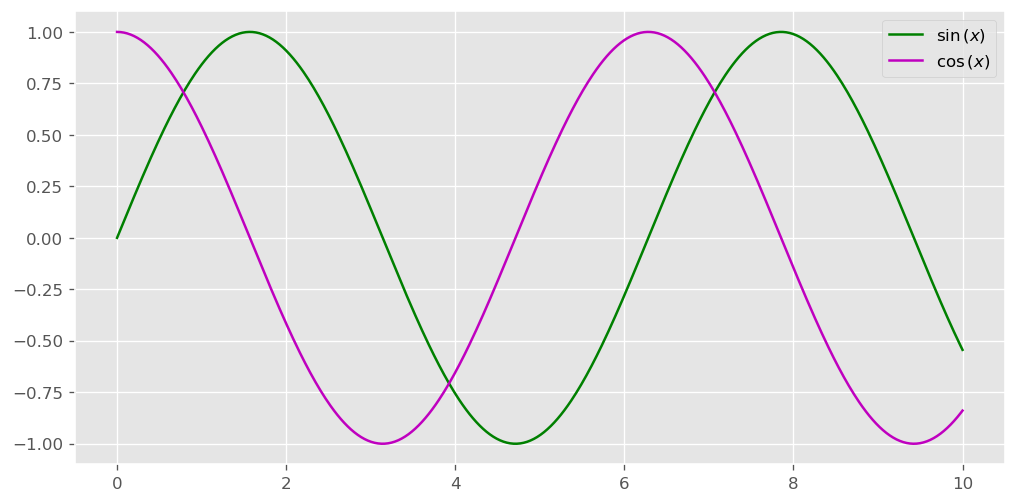

In [5]:
# Partimos creando una secuencia de datos.
x = np.linspace(start=0, stop=10, num=500)

# Construimos un gráfico con leyendas sencillas.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, np.sin(x), "-g", label=r"$\sin{(x)}$")
ax.plot(x, np.cos(x), "-m", label=r"$\cos{(x)}$")
ax.legend();

La leyenda del gráfico anterior cumple con el objetivo de referenciar correctamente qué significa cada una de las líneas que conforman dicho gráfico. Sin embargo, el método `legend()` acepta algunos argumentos adicionales. Uno de ellos es `loc`, que corresponde a un string que permite especificar la localización de la leyenda en el panel correspondiente. Por ejemplo, `loc="upper right"` permitirá ubicar la leyenda en la parte superior derecha del panel; `loc="center down"` ubicará la leyenda en el sector central inferior del gráfico; y `loc="lower left"` ubicará la leyenda en el sector inferior izquierdo del panel.

Otro elemento importante de una leyenda corresponde a la caja en la cual se dibuja la referencia correspondiente de cada gráfico, la que se conoce en la terminología de **Matplotlib** como *"frame"*. De esta manera, podemos diferenciar dicha caja del fondo del gráfico correspondiente mediante el parámetro Booleano `frameon`:

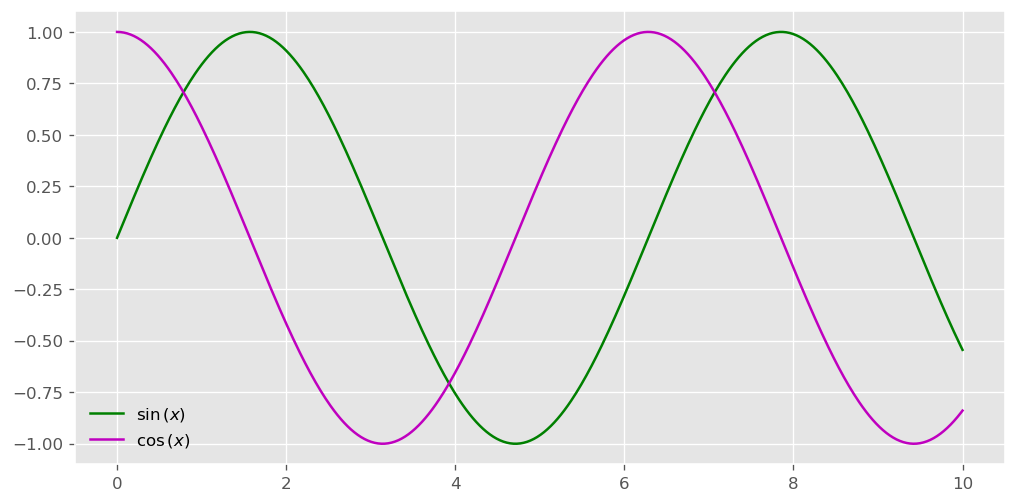

In [6]:
# Manipulamos algunos aspectos relativos a la leyenda.
ax.legend(loc="lower left", frameon=False)
fig

Por cierto, el parámetro `loc` acepta un valor llamado `"best"`, que permite que **Matplotlib** infiera la mejor posición de la leyenda en función de lo que dibujemos conforme cada función de graficación.

Otros parámetros que podemos manipular en el método `legend()` corresponden a `ncol`, que permite definir el número de columnas en las cuales se divide la leyenda; `framealpha`, que permite determinar la transparencia asociada al *frame* donde se dibuja la leyenda (y cuyo valor es de 0 a 1, desde más a menos transparencia); `fancybox`, que nos permite dibujar un *frame* no tan simple como el que está definido por defecto, y que es Booleano; `borderpad`, que es un argumento numérico que corresponde al tamaño del *frame* que contiene a la leyenda; y `shadow`, que es un parámetro Booleano que permite definir si el frame de la leyenda tendrá dibujada una sombra a modo de efecto 3D:

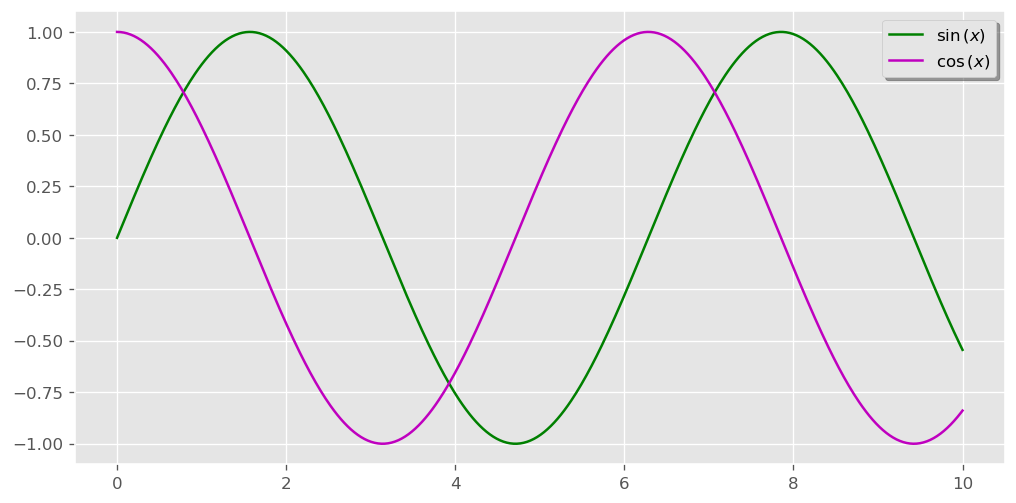

In [7]:
# Manipulamos columnas y el tipo de frame.
ax.legend(loc="best", shadow=True)
fig

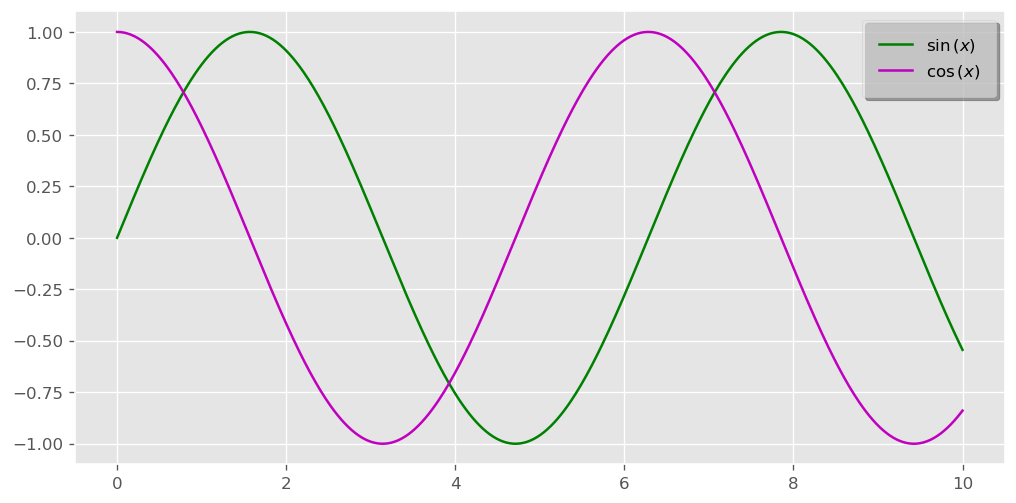

In [8]:
# Manipulamos más elementos de la leyenda.
ax.legend(loc="best", shadow=True, fancybox=True, borderpad=1, framealpha=0.6)
fig

Como ya hemos visto previamente, una leyenda incluye todos los elementos que han sido previamente rotulados en las funciones constructoras de gráficos. Si esto no es lo que queremos, podemos ajustar manualmente cuáles elementos y rótulos aparecerán en nuestro cuadro de leyenda, usando los objetos retornados por las funciones de tipo `ax.plot()`. Por ejemplo, dicha función es capaz de crear múltiples líneas al mismo tiempo, retornando a su vez una lista con las instancias creadas. Si pasamos cualquiera de estas instancias a la función `ax.legend()`, automáticamente le indicará a dicha función qué rótulos identificar:

In [9]:
# Generamos un arreglo con cuatro columnas para probar lo anterior.
y = np.exp(-x.reshape(-1, 1) + 2*np.arange(start=0, stop=2, step=0.5))

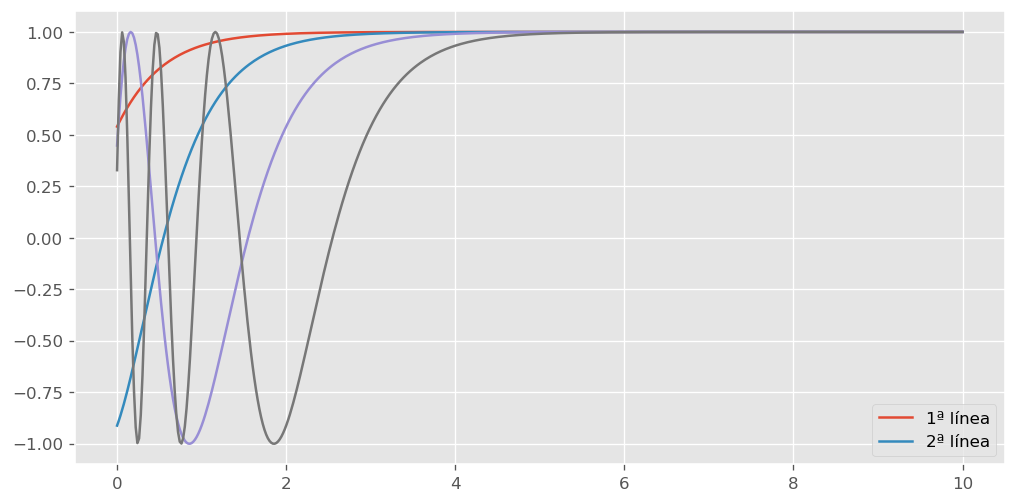

In [10]:
# Generamos un objeto que permite instanciar un gráfico de líneas para estas cuatro columnas.
plt.figure(figsize=(10, 5))
lines = plt.plot(x, np.cos(y))
plt.legend(lines[:2], ["1ª línea", "2ª línea"]);

Vemos pues que hemos forzado a que la leyenda solamente haga referencia a las primeras dos líneas graficadas, dejando las otras dos sin referencia alguna.

A veces, las opciones por defecto en las leyendas no son suficientes para las respectivas visualizaciones de información. Por ejemplo, quizás queramos utilizar el tamaño de los puntos en un gráfico de dispersión para demarcar ciertos atributos de nuestra data y, por extensión, nuestro interés sea que la leyenda muestre aquella información. Para ejemplificar lo anterior, haremos uso de un dataset relativo a la producción anual detallada por punto de extracción en una mina subterránea

**Ejemplo 3.1 - Leyenda asociada al tamaño de puntos:** La ubicación del dataset a utilizar es `datasets/pex_data.xlsx`:

In [11]:
# Accedemos a la data.
data = pd.read_excel("datasets/pex_data.xlsx")

In [12]:
# Mostramos las primeras filas de este DataFrame.
data.head()

,PEX,X,Y,ALT. EXTRAIBLE,PRODUCCION
0,0131H,1622.804335,-4174.759559,179.182548,194.851985
1,0132F,1637.693801,-4181.208870,216.512245,41.559977
2,0132H,1635.052940,-4162.514765,167.983638,202.235380
3,0133F,1649.951066,-4168.959076,215.765651,166.610602
4,0133H,1647.310205,-4150.264971,216.512245,261.675387


Dado que cada uno de los puntos de extracción que constituyen esta mina subterránea se encuentra individualizado por su denominación (que es dependiente de la combinación calle - zanja correspondiente), es una buena práctica indexar este DataFrame con respecto a la columna `"PEX"` de forma previa a construir nuestro gráfico:

In [13]:
# Indexamos nuestra data con respecto al nombre de cada punto de extracción.
data.set_index("PEX", inplace=True)

Vamos a mostrar cuatro dimensiones de información en un gráfico de dispersión, considerando las coordenadas mina de cada punto de extracción como dimensiones espaciales; la altura extraíble será identificada por medio del tamaño de cada punto, y la producción asociada a cada uno se referenciará por medio de su color. Una idea para esto podría ser la siguiente:

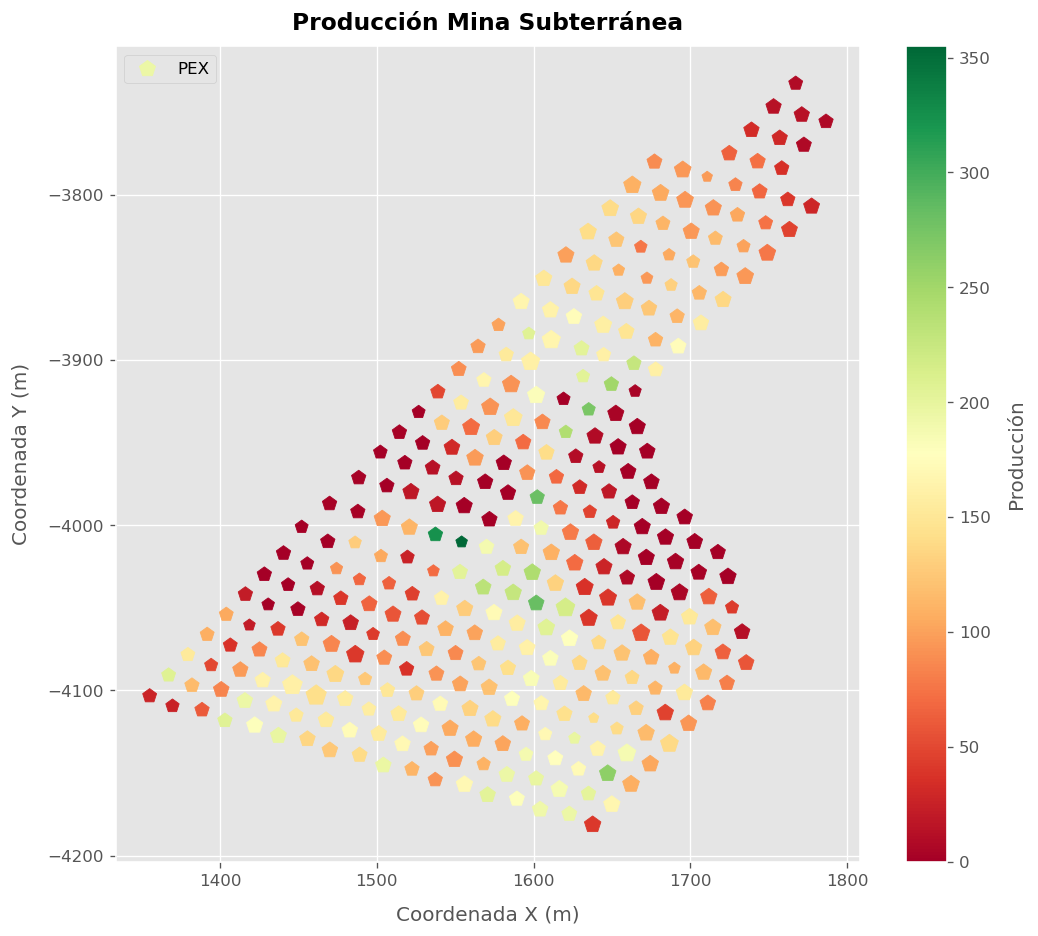

In [14]:
# Una primera aproximación para graficar la data de alturas y producción por cada PEX.
fig, ax = plt.subplots(figsize=(10, 9))
p = ax.scatter(
    x=data["X"], y=data["Y"], s=data["ALT. EXTRAIBLE"]/2, 
    c=data["PRODUCCION"], cmap="RdYlGn", label="PEX", marker ="p"
)
ax.set_xlabel("Coordenada X (m)", fontsize=12, labelpad=10)
ax.set_ylabel("Coordenada Y (m)", fontsize=12, labelpad=10)
ax.set_title("Producción Mina Subterránea", fontsize=14, fontweight="bold", pad=10)
cbar = plt.colorbar(p)
cbar.set_label("Producción", fontsize=12, labelpad=10)
ax.legend(loc="upper left");

El gráfico anterior pareciera no tener ningún problema. Sin embargo, la leyenda creada mediante el método `ax.legend()` solamente nos indica que cada punto en este gráfico es, de hecho, un punto de extracción. Pero no tenemos ninguna referencia acerca de los tamaños de cada uno y, por esa razón, no tenemos forma de saber qué significa esa información. Por ello, debemos manipular un poco el método `ax.legend()`, además de referenciar correctamente la información de las alturas extraíbles (que es la data que está siendo representada por el tamaño de cada punto):

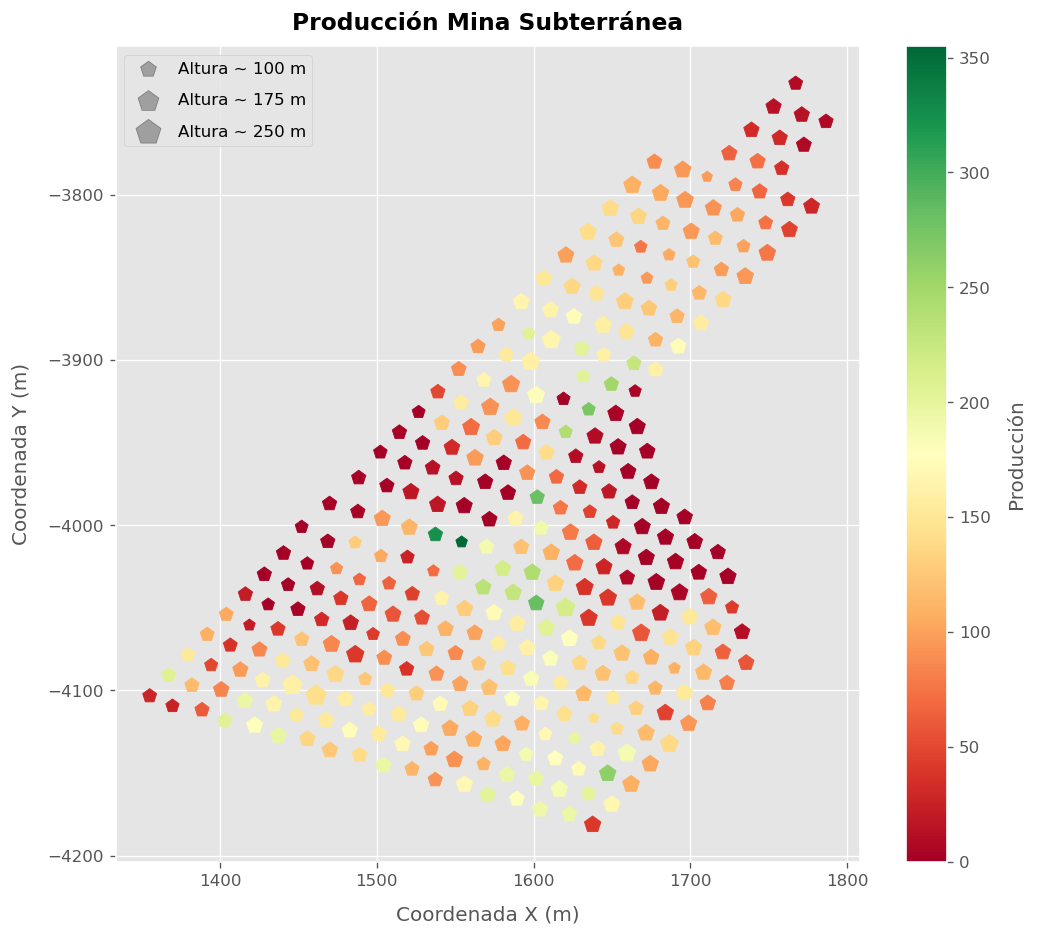

In [15]:
# Una primera aproximación para graficar la data de alturas y producción por cada PEX.
fig, ax = plt.subplots(figsize=(10, 9))
p = ax.scatter(
    x=data["X"], y=data["Y"], s=data["ALT. EXTRAIBLE"]/2, 
    c=data["PRODUCCION"], cmap="RdYlGn", marker ="p"
)
ax.set_xlabel("Coordenada X (m)", fontsize=12, labelpad=10)
ax.set_ylabel("Coordenada Y (m)", fontsize=12, labelpad=10)
ax.set_title("Producción Mina Subterránea", fontsize=14, fontweight="bold", pad=10)
cbar = plt.colorbar(p)
cbar.set_label("Producción", fontsize=12, labelpad=10)

# Aquí es donde crearemos la leyenda correcta para este gráfico.
for height_j in [100, 175, 250]:
    ax.scatter([], [], marker="p", c="k", alpha=0.3, s=height_j, label="Altura ~ "+str(height_j)+" m")
    ax.legend(scatterpoints=1, frameon=True, labelspacing=1);

Y ahora sí nuestra leyenda referencia correctamente la información que queremos comunicar. Para ello, hicimos uso del parámetro `scatterpoints`, que nos permite referenciar a qué gráfico de dispersión apunta la leyenda mostrada en el panel (en este caso, su valor es `1`, porque hace referencia sólo al gráfico vacío definido por la instrucción `ax.scatter([], [], c="k", alpha=0.3, s=height_j, label=str(height_j)+" m")`. Además de ello, usamos el parámetro `labelspacing`, simplemente para especificar cuántas unidades verticales (en magnitud de tamaño de fuente) separan cada entrada de la leyenda. Esta es una forma simple, pero efectiva, de *engañar* a **Matplotlib**.

## Creación de ejes secundarios.
Hasta ahora, hemos tenido el cuidado de aprender paso a paso cómo crear gráficos bidimensionales siempre con el mismo esquema: Usar solamente dos ejes de graficación en una correspondencia uno a uno. No obstante, **Matplotlib** dispone de herramientas que nos permiten aumentar la cantidad de ejes de graficación.

Tomemos el ejemplo de dos ejes verticales que permiten referenciar dos variables dependientes distintas, las cuales se visualizan en términos de su posible correspondencia con una única variable independiente. Vamos a ejemplificar este caso creando algo de data:

In [16]:
# Semilla aleatoria fija.
rng = np.random.default_rng(42)

In [17]:
# Creamos dos variables dependientes.
y1 = rng.normal(loc=1580, scale=220, size=(24, 1)) # Tratamiento de un molino SAG (tph).
y2 = rng.normal(loc=0.9, scale=0.1, size=(24, 1)) # Ley de Cu de entrada a un molino SAG (en %).

In [18]:
# Creamos un índice de fechas y llevamos todo a un DataFrame.
idx = pd.date_range(start="2021-01-01", end="2022-12-31", freq="M")
data = pd.DataFrame(
    data=np.concatenate([y1, y2], axis=1), 
    index=idx, columns=["Tonelaje", "Ley Cu"]
)

In [19]:
# Mostramos las primeras filas de esta DataFrame.
data.head()

,Tonelaje,Ley Cu
2021-01-31,1647.037758,0.857167
2021-02-28,1351.203497,0.864787
2021-03-31,1745.099263,0.953231
2021-04-30,1786.924238,0.936544
2021-05-31,1150.772258,0.941273


Para construir un eje de graficación vertical adicional, debemos *clonar* el eje horizontal del panel respectivo, de tal forma que el nuevo eje vertical estará definido sobre dicho clon del eje horizontal. Para clonar un eje horizontal, debemos trabajar usando la intefaz orientada a objetos, disponiendo de una figura y el panel respectivo asociados a objetos (que, como establecimos al comenzar nuestro viaje por **Matplotlib**), suelen ser `fig` y `ax`, respectivamente. De esta manera, sobre el panel (el objeto `ax`), usamos el método `ax.twinx()` para obtener un clon del eje horizontal definido en ese panel, asignándolo a otro objeto. Veamos esto por medio de un ejemplo:

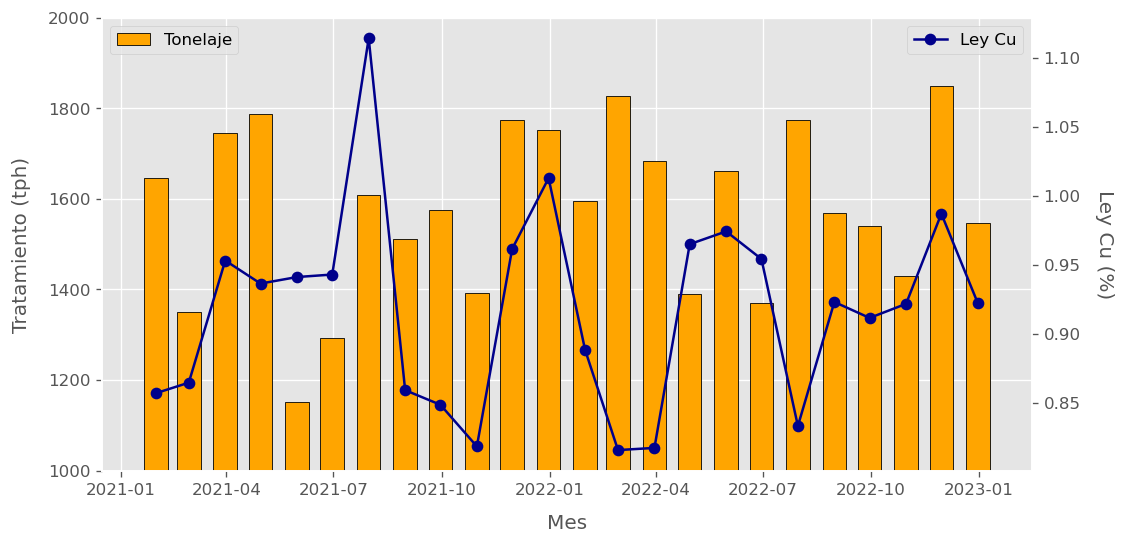

In [20]:
# Un gráfico sencillo con dos ejes verticales asociados a un único eje horizontal.
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx() # Aquí clonamos el eje horizontal.

# El primer gráfico lo dibujamos referido a ax1.
ax1.bar(data.index, data["Tonelaje"], width=20, label="Tonelaje", color="orange", edgecolor="black")

# El segundo gráfico lo dibujamos referido a ax2.
ax2.plot(data.index, data["Ley Cu"], label="Ley Cu", color="darkblue", marker="o")

# Para evitar confusiones, apagamos la grilla de fondo del segundo par de ejes.
ax2.grid(False)

# Y ahora asignamos cada elemento a los pares de ejes correspondientes.
ax1.set_xlabel("Mes", fontsize=12, labelpad=10)
ax1.set_ylabel("Tratamiento (tph)", fontsize=12, labelpad=10)
ax2.set_ylabel("Ley Cu (%)", fontsize=12, labelpad=20, rotation=270)
ax1.set_ylim(1000, 2000)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right");

Todo quedó perfecto, con excepción de la leyenda. Notemos que hay dos leyendas, debido a que cada una de ellas está referida a un panel diferente. Y por lo tanto, se crean dos *frames* distintos. Podemos resolver ésto recuperando cada etiqueta de los gráficos respectivos, concatenándolas y luego asignándolas a la función `ax.legend()`. Para ello usamos el método `get_legend_handles_labels()`, el cual retorna dos objetos: El dibujo del gráfico como tal (que es un objeto que depende del tipo de gráfico; para gráficos de barras, es un objeto del tipo `matplotlib.container.BarContainer`, y para gráficos de líneas, es un objeto del tipo `matplotlib.lines.Line2D`) y las etiquetas que les asignamos a cada uno de ellos mediante el parámetro `label`. Cada uno de estos objetos viene asociado a una lista, por lo que son concatenables. Por lo tanto, sobre cualquiera de los paneles del gráfico, podemos asignar como rótulo de leyenda a la concatenación de cada uno de estos objetos:

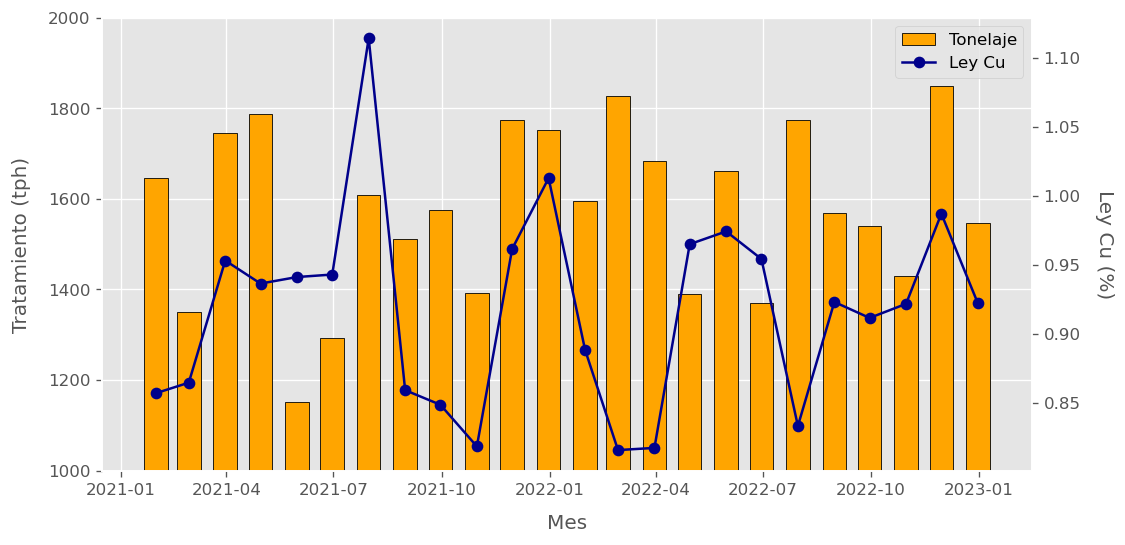

In [21]:
# Lo mismo de antes, pero con la leyenda bien hecha.
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx() # Aquí clonamos el eje horizontal.

# El primer gráfico lo dibujamos referido a ax1.
ax1.bar(data.index, data["Tonelaje"], width=20, label="Tonelaje", color="orange", edgecolor="black")

# El segundo gráfico lo dibujamos referido a ax2.
ax2.plot(data.index, data["Ley Cu"], label="Ley Cu", color="darkblue", marker="o")

# Para evitar confusiones, apagamos la grilla de fondo del segundo par de ejes.
ax2.grid(False)

# Ahora trabajamos la leyenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc=0)

# Y ahora asignamos cada elemento a los pares de ejes correspondientes.
ax1.set_xlabel("Mes", fontsize=12, labelpad=10)
ax1.set_ylabel("Tratamiento (tph)", fontsize=12, labelpad=10)
ax2.set_ylabel("Ley Cu (%)", fontsize=12, labelpad=20, rotation=270)
ax1.set_ylim(1000, 2000);

Y ahí ya quedo perfecto nuestro gráfico.

**Ejemplo 3.2 - Construcción de una curva de tonelaje versus ley:** El archivo `datasets/CuAu210.xlsx` contiene los datos relativos a una sección pequeña del inventario de bloques de un sector de interés adyacente a una mina, denominada *NW-215xxx*, la cual es explotada mediante una operación a cielo abierto y cuyo producto principal es cobre, con un subproducto importante de oro. Cada columna representa un conjunto determinado de bloques del modelo respectivo, y cada fila está referida a la ley de cobre y de oro de cada bloque (en ese orden, hacia abajo).

Vamos a suponer que el área de planificación a largo plazo de esta mina está interesada en determinar rápidamente el potencial económico de este sector, a fin de tomar la decisión de incorporarlo en el Plan Minero a Largo a Plazo (PMLP) de la compañía. Por lo tanto, el paso cero de este análisis es construir una curva de tonelaje versus ley equivalente asociada a este sector, para lo cual disponemos de la información técnico-económica detallada en la Tabla (3.1):

<p style="text-align: center;">Tabla (3.1): Información técnica-económica para este ejercicio</p>

| Parámetro de interés    | Valor | Unidad (si corresponde) |
| :---------------------- | :---- | :---------------------- |
| Precio del cobre        | 380   | cUSS/lb                 | 
| Precio del oro          | 1850  | USS/oz                  |
| Recuperación Cu         | 85    | %                       |
| Recuperación Au         | 78    | %                       |
| Costo mina              | 3.2   | USS/t material          |
| Costo planta            | 12.8  | USS/t mineral           |
| Costo remoción estéril  | 0.92  | USS/t material          |
| Costo venta concentrado | 1.00  | US$/lb Cu procesado     |
| Tasa de descuento       | 16    | %                       |
| Ley de concentrado      | 28    | %                       |

También disponemos de información geométrica necesaria para construir la curva de tonelaje versus ley en la Tabla (3.2).

| Parámetro                      | Valor          | Unidad         |
| :----------------------------- | :------------- | :------------- |
| Dimensión en X                 | 25             | m              |
| Dimensión en Y                 | 25             | m              |
| Dimensión en Z                 | 20             | m              |
| Densidad del mineral (in-situ) | 2.8            | $t/m^{3}$      |

Lo primero es acceder al archivo con el inventario de bloques:

In [22]:
# Accedemos al archivo.
blocks = pd.read_excel("datasets/CuAu210.xlsx")

In [23]:
# Observamos las primeras filas de este archivo.
blocks.head()

,Instancia,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B65,B66,B67,B68,B69,B70,B71,B72,B73,B74
0,Cu_1,0.098,0.085,0.108,0.111,0.105,0.087,0.093,0.099,0.098,...,0.105,0.094,0.113,0.098,0.108,0.099,0.094,0.098,0.100,0.097
1,Au_1,0.075,0.241,0.280,0.394,0.142,0.123,0.115,0.438,0.367,...,0.106,0.196,0.075,0.230,0.357,0.137,0.285,0.159,0.258,0.393
2,Cu_2,0.099,0.102,0.089,0.094,0.093,0.093,0.109,0.103,0.090,...,0.094,0.104,0.099,0.099,0.102,0.100,0.083,0.102,0.094,0.094
3,Au_2,0.565,0.156,0.270,0.433,0.114,0.096,0.228,0.142,0.153,...,0.133,0.142,0.154,0.257,0.126,0.199,0.145,0.311,0.179,0.370
4,Cu_3,0.110,0.103,0.083,0.103,0.103,0.098,0.089,0.125,0.112,...,0.097,0.097,0.086,0.100,0.100,0.096,0.099,0.095,0.098,0.094


Ahora indexamos nuestro inventario conforme las instancias definidas en la primera columna de la base de datos. Esto es importante, ya que la construcción de las curvas de tonelaje vs ley requiere de individualizar cada elemento por bloque:

In [24]:
# Indexamos este DataFrame respecto de cada identificador de fila del inventario.
blocks.set_index("Instancia", inplace=True)

Ahora separamos cada una de las instancias que dan cuenta de las leyes de mineral, a fin de facilitar nuestro trabajo. También visualizaremos las leyes mediante un gráfico de dispersión con un mapa de color adecuado, de manera que podamos tener una idea de la distribución espacial de las leyes de este cuerpo mineralizado:

In [25]:
# Separación de las leyes de cada bloque por elemento de interés.
blocks_cu = blocks.loc[[f"Cu_{j}" for j in range(1, len(blocks)//2 + 1)]]
blocks_au = blocks.loc[[f"Au_{j}" for j in range(1, len(blocks)//2 + 1)]]

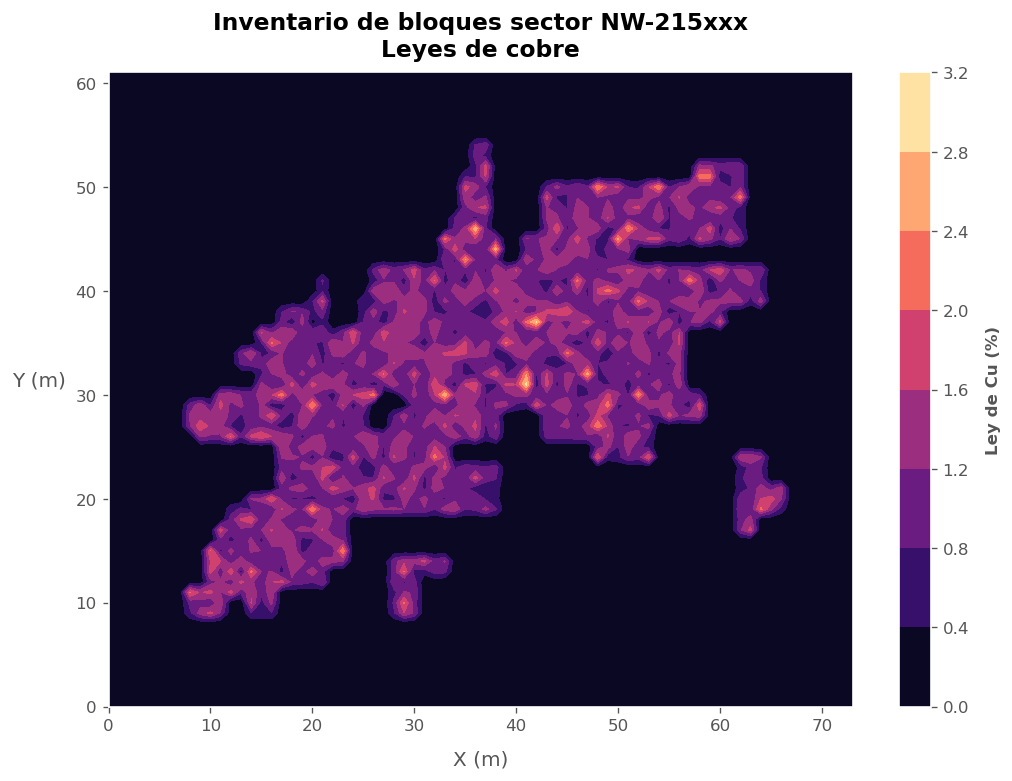

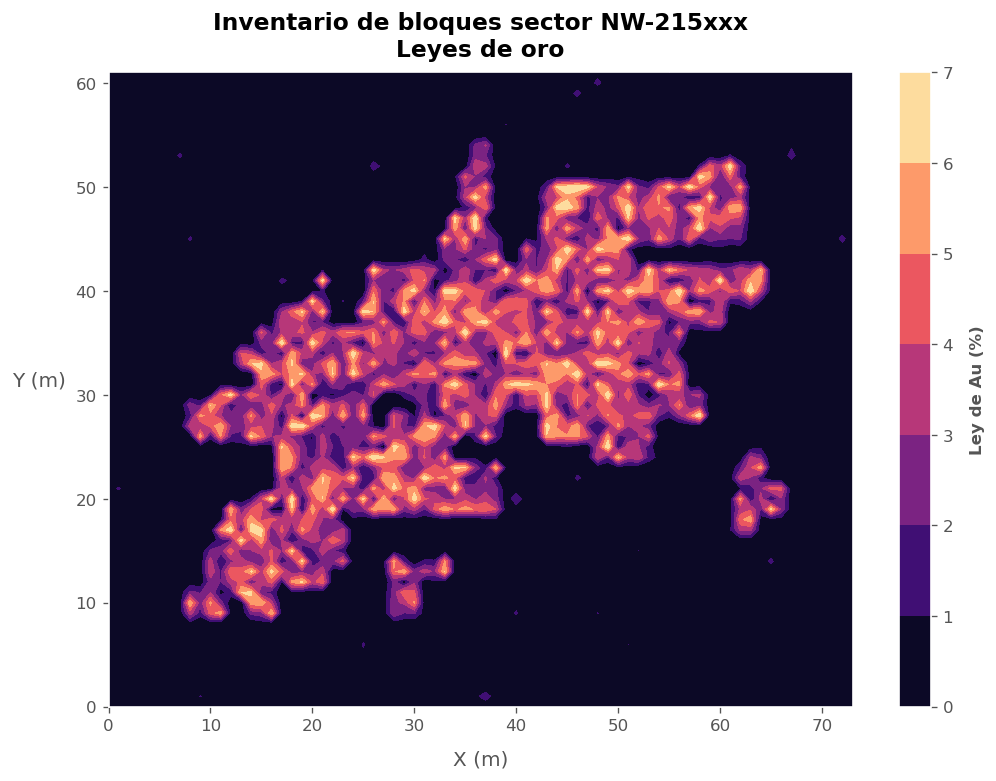

In [26]:
# Visualización rápida de estos inventarios de bloques mediante un histograma.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(blocks_cu.values, cmap="magma")
ax.set_xlabel("X (m)", fontsize=12, labelpad=10)
ax.set_ylabel("Y (m)", fontsize=12, labelpad=22, rotation=0)
ax.set_title(
    "Inventario de bloques sector NW-215xxx\nLeyes de cobre", 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Ley de Cu (%)", fontsize=10, fontweight="bold", labelpad=10);

fig, ax = plt.subplots(figsize=(10, 7))
p = ax.contourf(blocks_au.values, cmap="magma")
ax.set_xlabel("X (m)", fontsize=12, labelpad=10)
ax.set_ylabel("Y (m)", fontsize=12, labelpad=22, rotation=0)
ax.set_title(
    "Inventario de bloques sector NW-215xxx\nLeyes de oro", 
    fontsize=14, fontweight="bold", pad=10
)
cb = plt.colorbar(p)
cb.set_label("Ley de Au (%)", fontsize=10, fontweight="bold", labelpad=10);

La visualización de las leyes justifica, al menos en términos visuales, el hecho de que el oro sea un producto secundario de esta operación.

Necesitamos ahora determinar el inventario de cobre equivalente de este sector. Decimos cobre equivalente (y no oro equivalente) debido a que, en un principio, se ha establecido que el cobre es el producto principal a explotar, y el oro un subproducto. Para determinar el cobre equivalente, se debe utilizar un factor de conversión para el oro a fin de expresarlo en unidades de cobre, llamado **factor de equivalencia**, definido como $F_{eq}=\frac{R_{s}P_{s}}{R_{p}P_{p}}$, donde ${R_s}$ es la recuperación metalúrgica asociada para el subproducto (en este caso, el oro), ${P_s}$ es el precio del subproducto de interés en el mercado (nuevamente, el oro), ${R_p}$ es la recuperación metalúrgica estimada para el producto principal (en este caso, el cobre), y ${P_p}$ es el precio del producto principal de interés en el mercado (otra vez, el cobre).

Cada factor de equivalencia debe calcularse considerando las mismas unidades de precio y recuperación. Esto se cumple, conforme el enunciado del problema, para la recuperación, pero no para el precio. Por lo tanto, calcularemos los precios respectivos de cada metal, en US$/t, a fin de usar las mismas unidades en cada caso. Para ello, consideraremos que 1 t = 2204 lb = 35274 oz. Así:

In [27]:
# Construimos un diccionario para alojar ahí los parámetros de entrada de nuestro problema.
params = {
    "cu_price": 3.8,
    "au_price": 1850,
    "cu_recov": 85,
    "au_recov": 78,
    "costs":{
        "mine": 3.2,
        "plant": 12.8,
        "waste": 0.92,
        "sell" : 1.00
    },
    "d_rate": 0.16
}

In [28]:
# Y ahora calculamos los precios en US$/t.
cu_price_corr = params["cu_price"] * 2204
au_price_corr = params["au_price"] * 35274

# Y el factor de equivalencia.
eq_factor = (params["au_recov"] * au_price_corr) / (params["cu_recov"] * cu_price_corr)

Ahora calculamos el inventario equivalente de cobre. Recordemos que, para ello, las leyes de ambos minerales deben estar en las mismas unidades (en este caso, usaremos las unidades de cobre). Por ello, la ley de Au se dividirá por 10000 (que es la proporción que hay entre una parte por cien y una parte por millón). En otras palabras: 1 % = 10000 gpt:

In [29]:
blocks_cu_eq = pd.DataFrame(
    data=blocks_cu.values + (blocks_au.values/10000)*eq_factor,
    index=[f"CuEq_{j}" for j in range(1, len(blocks_cu)+1)],
    columns=blocks_cu.columns
)

Por un tema netamente ilustrativo, podemos visualizar la distrbución resultante de Cu equivalente:

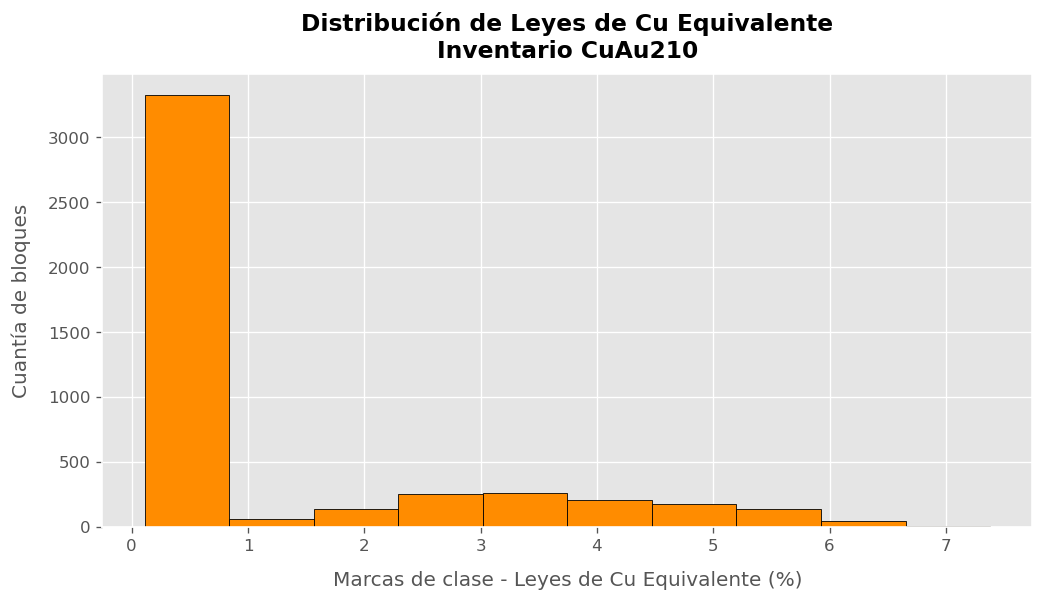

In [30]:
# Histogramas de leyes de cobre equivalente.
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(
    np.ravel(blocks_cu_eq.values), bins=10, edgecolor="k", 
    color="darkorange", label="Ley de Cu Eq (%)"
)
ax.set_title(
    "Distribución de Leyes de Cu Equivalente\nInventario CuAu210", 
    fontsize=14, fontweight="bold", pad=10
)
ax.set_ylabel("Cuantía de bloques", fontsize=12, labelpad=10)
ax.set_xlabel("Marcas de clase - Leyes de Cu Equivalente (%)", fontsize=12, labelpad=10);

Ahora construiremos las curvas de tonelaje vs ley para los tres casos descritos previamente. Para ello, debemos utilizar la información relativa a la geometría de los bloques de este inventario. Por lo tanto, pasaremos la tabla suministrada en el enunciado a un formato de diccionario de Python:

In [31]:
geom_params = {"dx": 25, "dy": 25, "dz": 20, "density": 2.8}

Calculamos el tonelaje completo asociado a este inventario:

In [32]:
# Masa de un bloque.
block_mass = geom_params["dx"] * geom_params["dy"] * geom_params["dz"] * geom_params["density"]

# Cuantía total de bloques.
n_blocks = blocks_cu_eq.shape[0] * blocks_cu_eq.shape[1]

# Masa total del inventario (en Mt).
total_mass = block_mass * n_blocks / 1000000

Ahora debemos construir las tablas requeridas para el gráfico de tonelaje versus ley. Primero ilustraremos en detalle el caso de la curva de leyes de Cu:

In [33]:
# Como las leyes de Cu se distribuyen entre 0% y 3%, distribuiremos los intervalos de clase utilizando
# estos mismos valores.
min_cu_grade = np.round(np.linspace(0, 2.7, 20), 2)
max_cu_grade = np.concatenate([min_cu_grade[1:], np.array([3.0])])
class_mark_cu = np.round(
    np.linspace((min_cu_grade[0] + max_cu_grade[0])/2, (min_cu_grade[-1] + max_cu_grade[-1])/2, 20), 2
)

In [34]:
# Las leyes anteriores constituyen intervalos de clase y su respectiva marca de clase para las 
# leyes de cobre. De lo anterior, las pasaremos a un formato de dataframe para así trabajar 
# rápidamente con ellas.
cu_table = pd.DataFrame(
    data=np.column_stack([min_cu_grade, class_mark_cu, max_cu_grade]),
    columns=["Menor (%)", "Clase (%)", "Mayor (%)"]
)

In [35]:
# Y ahora calculamos las frecuencias respectivas. Para ello, primero definimos una versión 
# "aplanada" de nuestro inventario de cobre, a fin de facilitar nuestro trabajo.
blocks_cu_flat = np.ravel(blocks_cu)

# Creamos la columna de frecuencias en nuestro dataframe.
cu_table["Frecuencia"] = 0

# Y calculamos las frecuencias rápidamente.
freqs = np.histogram(blocks_cu_flat, bins=20)[0]

# Asignándolas a la tabla de frecuencias.
cu_table["Frecuencia"] = freqs

Para comprobar que hemos hecho correctamente el cálculo, basta con verificar que la suma de todas las frecuencias es igual a la suma de todos los bloques del inventario.

In [36]:
freqs.sum() == blocks_cu.size

True

Ahora debemos calcular las frecuencias porcentuales de cada intervalo de leyes:

In [37]:
cu_table["Porcentaje (%)"] = 0

for j in range(len(cu_table)):
    cu_table.loc[j, "Porcentaje (%)"] = cu_table.loc[j, "Frecuencia"] / cu_table["Frecuencia"].sum()

Y luego, el porcentaje acumulado asociado a cada intervalo de leyes:

In [38]:
cu_table["Porcentaje acumulado (%)"] = cu_table["Porcentaje (%)"].cumsum()

A continuación, la masa de material asociado a cada intervalo de leyes:

In [39]:
cu_table["Tonelaje (Mt)"] = cu_table["Porcentaje (%)"] * total_mass

Y la masa acumulada de mineral para cada intervalo:

In [40]:
for j in range(len(cu_table)):
    if j == 0:
        cu_table.loc[j, "Mineral (Mt)"] = cu_table["Tonelaje (Mt)"].sum()
    else:
        cu_table.loc[j, "Mineral (Mt)"] =\
            cu_table.loc[j-1, "Mineral (Mt)"] - cu_table.loc[j-1, "Tonelaje (Mt)"]

Luego, calculamos las leyes medias de mineral para cada subconjunto de bloques. Para ello, primero, creamos la columna respectiva, y luego calculamos las leyes medias por intervalos mediante un loop sencillo:

In [41]:
for j in range(len(cu_table)):
    queried_blocks = blocks_cu_flat[
        (blocks_cu_flat > cu_table.loc[j, "Menor (%)"]) & (blocks_cu_flat <= cu_table.loc[j, "Mayor (%)"])
    ]
    avg_j = queried_blocks.mean()
    cu_table.loc[j, "Ley media (%)"] = avg_j

Ya solo nos queda calcular las razones estéril-mineral por intervalo. Para ello, primero generamos una columna para calcular el estéril acumulado por intervalo:

In [42]:
cu_table["Esteril acumulado (Mt)"] = 0

Luego generamos el cálculo mediante un loop:

In [43]:
for j in range(len(cu_table)):
    if j == 0:
        cu_table.loc[j, "Esteril acumulado (Mt)"] = 0.0
    elif j == 1:
        cu_table.loc[j, "Esteril acumulado (Mt)"] = cu_table.loc[j-1, "Tonelaje (Mt)"]
    else:
        cu_table.loc[j, "Esteril acumulado (Mt)"] =\
            cu_table.loc[j-1, "Esteril acumulado (Mt)"] + cu_table.loc[j-1, "Tonelaje (Mt)"]

Finalmente, calculamos la razón estéril-mineral (REM):

In [44]:
cu_table["RLM"] = cu_table["Esteril acumulado (Mt)"] / cu_table["Mineral (Mt)"]

El resultado de los cálculos anteriores es la siguiente **tabla de tonelaje versus ley** para las leyes de cobre:

In [45]:
cu_table

,Menor (%),Clase (%),Mayor (%),Frecuencia,Porcentaje (%),Porcentaje acumulado (%),Tonelaje (Mt),Mineral (Mt),Ley media (%),Esteril acumulado (Mt),RLM
0,0.00,0.07,0.14,3343,0.728640,0.728640,117.005,160.580,0.100619,0.000,0.000000
1,0.14,0.22,0.28,1,0.000218,0.728858,0.035,43.575,0.250000,117.005,2.685141
2,0.28,0.36,0.43,9,0.001962,0.730820,0.315,43.540,0.427076,117.040,2.688103
3,0.43,0.51,0.57,56,0.012206,0.743025,1.960,43.225,0.523667,117.355,2.714980
4,0.57,0.66,0.71,146,0.031822,0.774847,5.110,41.265,0.648726,119.315,2.891433
5,0.71,0.80,0.85,184,0.040105,0.814952,6.440,36.155,0.784478,124.425,3.441433
6,0.85,0.95,0.99,177,0.038579,0.853531,6.195,29.715,0.918900,130.865,4.404005
7,0.99,1.09,1.14,171,0.037271,0.890802,5.985,23.520,1.061028,137.060,5.827381
8,1.14,1.24,1.28,161,0.035092,0.925894,5.635,17.535,1.205620,143.045,8.157685
9,1.28,1.39,1.42,115,0.025065,0.950959,4.025,11.900,1.347135,148.680,12.494118


Ya sólo nos resta construir la curva de tonelaje versus ley para el caso del cobre:

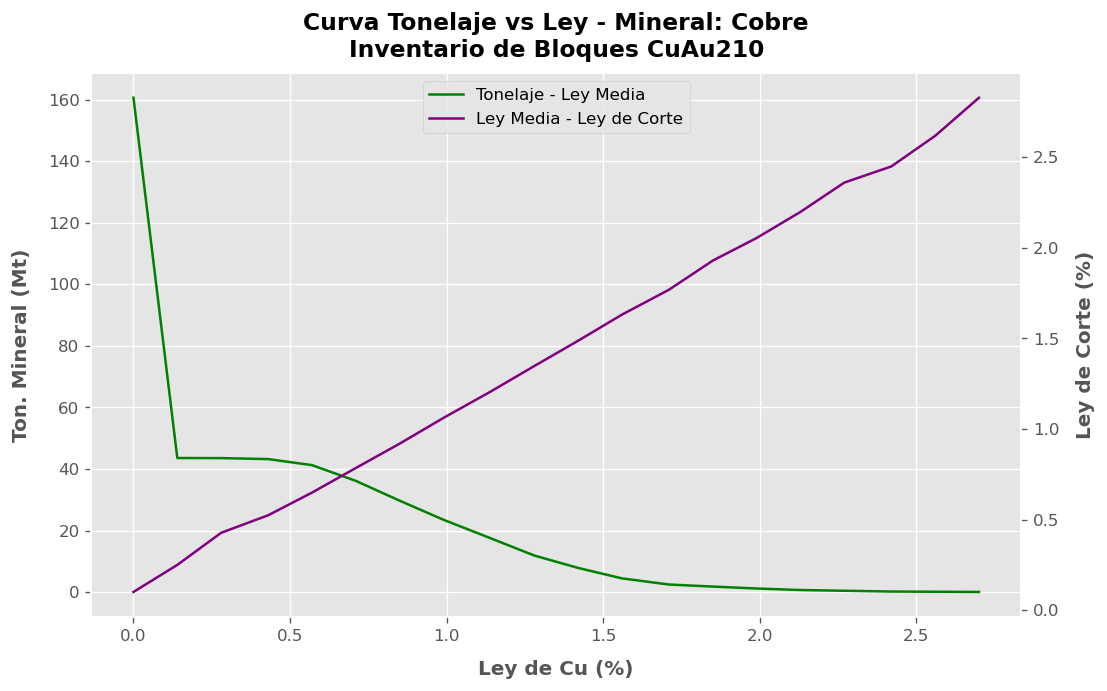

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
ax1 = ax.twinx()
p1 = ax.plot(
    cu_table["Menor (%)"], cu_table["Mineral (Mt)"], color="green", label="Tonelaje - Ley Media"
)
p2 = ax1.plot(
    cu_table["Menor (%)"], cu_table["Ley media (%)"], color="purple", label="Ley Media - Ley de Corte"
)
ax1.grid(False)
ax.set_xlabel("Ley de Cu (%)", fontsize=12, fontweight="bold", labelpad=10)
ax.set_ylabel("Ton. Mineral (Mt)", fontsize=12, fontweight="bold", labelpad=10)
ax1.set_ylabel("Ley de Corte (%)", fontsize=12, fontweight="bold", labelpad=10)
p = p1 + p2
labels = [l.get_label() for l in p]
ax.legend(p, labels, loc="upper center")
ax.set_title(
    "Curva Tonelaje vs Ley - Mineral: Cobre\nInventario de Bloques CuAu210", 
    fontsize=14, fontweight="bold", pad=10
);

Lo que resuelve el problema de calcular esta curva para el caso únicamente d elas leyes de cobre. El caso del cobre equivalente se deja como ejercicio al lector. ◼︎

## Personalización de barras de color.

### Aspectos relativos a la elección de un mapa de colores.
Como ya hemos visto varias veces en esta asignatura, los mapas de colores, cuando son utilizados por un determinado tipo de gráfico, suelen ser implementados por medio del parámetro `cmap`. Para referenciar el significado de dicho mapa de colores, solemos usar la función `plt.colorbar()` para construir una barra que especifique el significado de cada color conforme el valor de la variable asignada al mapa completo.

Consideremos el siguiente ejemplo, en el cual haremos uso del método `imshow()`, y que permite graficar imágenes conforme un mapa de colores determinado. Las imágenes, como bien sabemos, no son más que arreglos de Numpy cuyos elementos representan ciertas intensidades de pixel y colores en un determinado canal:

In [47]:
# Definimos una secuencia de valores para crear el gráfico.
x = np.linspace(start=0, stop=20, num=1000)
y = np.cos(x)*np.sin(x.reshape(-1, 1))

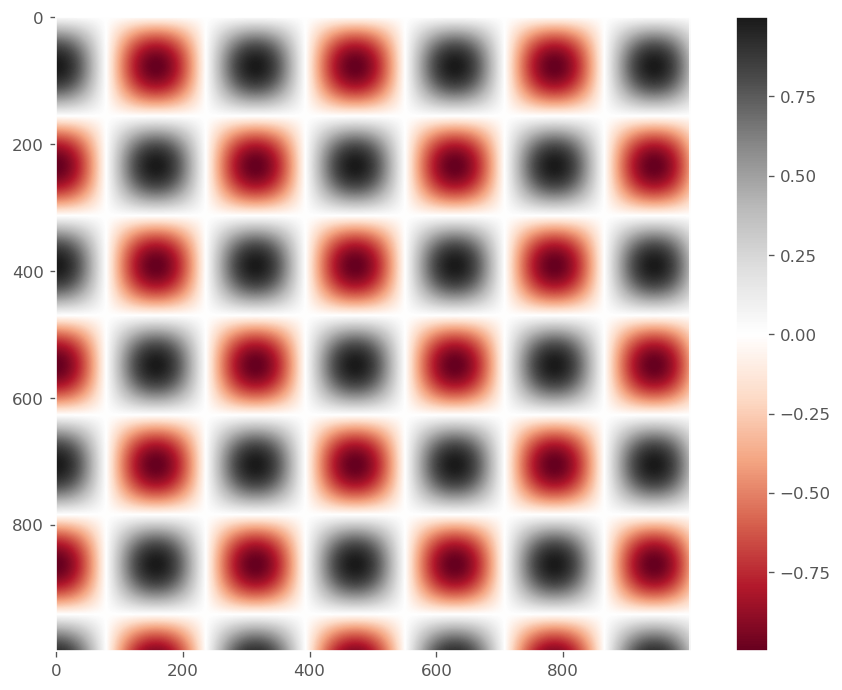

In [48]:
# Creamos el gráfico.
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.imshow(y, cmap="RdGy")
ax.grid(False)
cb = plt.colorbar(p);

El color es un aspecto fundamental en la visión de los seres humanos y, por supuesto, resulta importante en el diseño de cualquier figura. Por esa razón, su elección resulta fundamental. Si existen elementos importantes en un gráfico, podemos usar colores para poder destacarlos. Sin embargo, es muy justo preguntarnos si efectivamente es necesario darle uso al color en un gráfico y no simplemente hacer uso únicamente de una escala de grises. Aquello resulta evidente si el gráfico anterior se expresa en dicha escala:

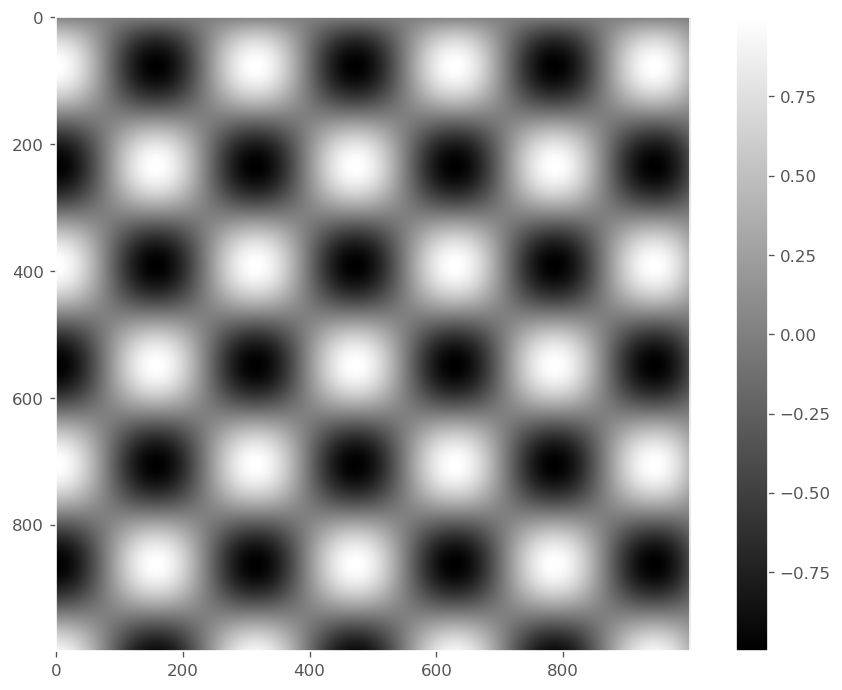

In [49]:
# Mismo gráfico anterior, pero en escala de grises. 
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.imshow(y, cmap="gray")
ax.grid(False)
cb = plt.colorbar(p);

Vemos que el gráfico nos permite la visualización de una función multimodal; es decir, con una cantidad enorme (posiblemente infinita) de máximos y mínimos locales. Por lo tanto, el color debe ser escogido de tal forma que podamos diferenciar de manera clara y *natural* donde están, en el gráfico, tales máximos y mínimos. El mapa de color `RdGy` cumple con ese propósito a la perfección, porque nos permite asociar inmediatamente los mínimos locales al color rojo, y los máximos locales al color negro. Cualquier mapa de color de tipo divergente, con extremos bien diferenciados y una combinación de dos colores con el blanco en la frontera de ambos, puede cumplir pefectamente con esta tarea, ya que observamos que la data está centrada con respecto a un valor medio. El mapa de color `gray` también nos permite diferenciar máximos y mínimos locales, pero con mayor dificultad.

Existen fundamentalmente tres tipos de mapas de color:

- **Mapas de color secuenciales:** Que están conformados por una secuencia continua de colores (por ejemplo, `viridis` o `binary`).
- **Mapas de color divergentes:** Usualmente contienen dos colores distintivos, y permiten mostrar desviaciones positivas o negativas con respecto a un valor medio (por ejemplo, `RdGy` o `PuOr`).
- **Mapas de color cualitativos:** Mezclan colores que no siguen una secuencia uniforme de frecuencias (por ejemplo, `rainbow` o `cubehelix`).

El mapa de color `jet`, que es la opción por defecto en versiones de **Matplotlib** anteriores a la 2.0, es un ejemplo de mapa cualitativo. Su estado como opción por defecto fue desafortunada en su tiempo, porque los mapas cualitativos generalmente son opciones muy pobres para representar variaciones de variables continuas. Entre estos problemas, se considera además el hecho de que estos mapas de color usualmente no muestran ninguna progresión de tipo uniforme a medida de que aumenta el brillo en la escala de color. Podemos ver esto convirtiendo el mapa de color `jet` a su respectiva escala de grises:

In [50]:
from matplotlib.colors import LinearSegmentedColormap

In [51]:
# Construimos una función para transformar cualquier mapa de color de Matplotlib en su
# misma versión, pero en escala de grises.
def grayscale_cmap(cmap):
    """
    Función que retorna una versión en escala de grises de un mapa de color dado
    """
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # Convertimos un modelo RGBA a una escala perceptiva de grises con luminancia definida
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance.reshape(-1, 1)
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

In [52]:
# Función que nos permite visualizar cualquier mapa de color de Matplotlib.
def view_colormap(cmap):
    """
    Función que grafica un mapa de color con su equivalente en escala de grises
    """
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

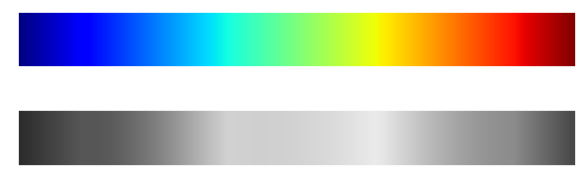

In [53]:
# Transformamos el mapa de color "jet" a su versión escala de grises.
view_colormap('jet')

Notemos las líneas brillantes en el mapa de color en escala de grises. Incluso a todo color, este brillo no uniforme significa que el ojo verá atraída su atención a ciertas porciones del rango de color, lo que hará énfasis, potencialmente, en partes no importantes del conjunto de datos respectivo. Es mejor, en este caso, un mapa de color como `viridis` (opción por defecto en **Matplotlib** desde su versión 2.0), el cual está construido especialmente por su crecimiento uniforme de brillo a lo largo de su rango de colores:

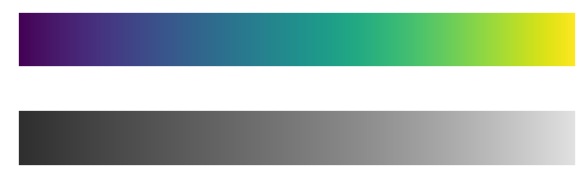

In [54]:
# Transformamos el mapa de color "viridis" a su versión escala de grises.
view_colormap('viridis')

Para otras situaciones, tales como aquellas en las que deseamos mostrar desviaciones positivas y negativas de una media, mapas de color duales como `RdGy` pueden ser muy útiles. Sin embargo, podemos notar que, en una transformación a escala de grises, dicha información se pierde:

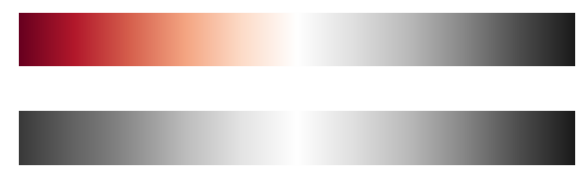

In [55]:
# Transformamos el mapa de color "RdGy" a su versión escala de grises.
view_colormap('RdGy')

### Límites de color y extensiones.
**Matplotlib** nos provee de un amplio rango de alternativas para la personalización de barras de colores. La barra de color misma es una instancia de un objeto de tipo `plt.Axes`, por lo que todos los métodos de formateo de ejes y rótulos que hemos visto previamente son aplicables aquí. La barra de color como tal posee una flexibilidad interesante: Por ejemplo, podemos fijar los límites de color e indicar los colores fuera de los límites de la barra que queremos mostrar mediante símbolos triangulares al extremo de las barras mediante la propiedad `extend`. Esto podría ser muy útil para graficar data con ruido significativo:

In [56]:
# Generamos ruido en el 1% de los pixeles de la imagen
added_noise = (rng.random(y.shape) < 0.01)
y[added_noise] = rng.normal(0, 3, np.count_nonzero(added_noise))

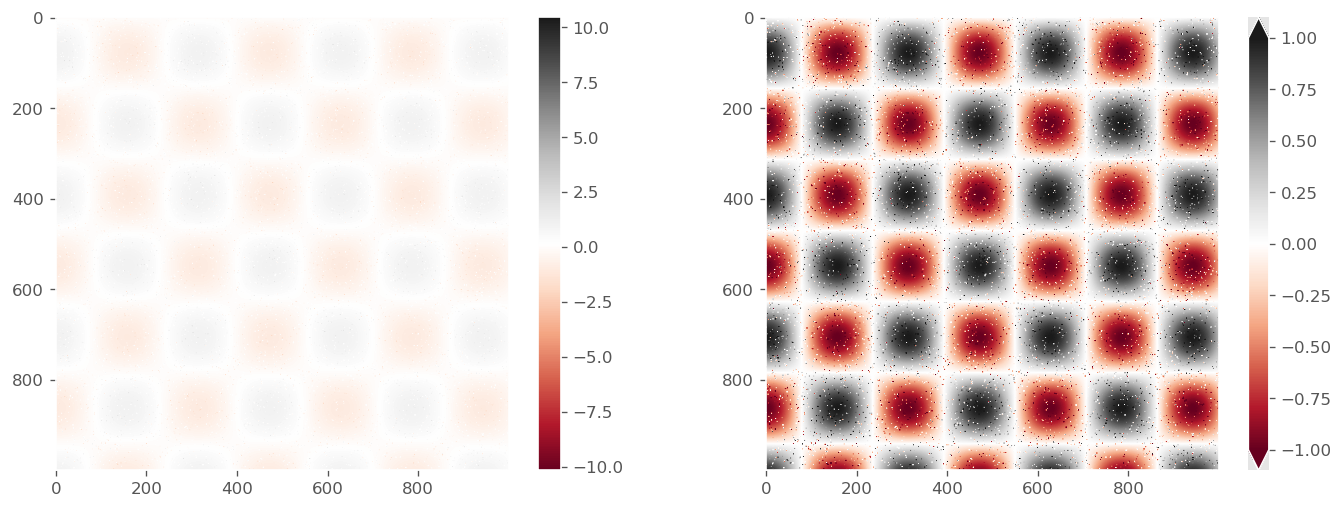

In [57]:
# Graficamos la imagen anterior, pero con el ruido añadido.
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(y, cmap='RdGy')
plt.colorbar()
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(y, cmap='RdGy')
plt.colorbar(extend='both')
plt.grid(False)
plt.clim(-1, 1);

Notemos que, en el panel del lado izquierdo, los límites de color por defecto responden al hecho de que los pixeles con ruido tienen valores muy extremos, por lo que el rango de valores (colores) que es de nuestro interés de ve completamente distorsionado por tales variaciones extremas. En el panel del lado derecho, seteamos los límites de color manualmente (mediante la función `plt.clim()`), y añadimos extensiones para indicar que existen valores fuera de estos límites. El resultado es, por lo tanto, más claro.

### Barras de color discretas.
Los mapas de color son, por defecto, continuos, pero con frecuencia tenemos la necesidad de representar valores de tipo discreto (típicos de variables categóricas). La forma más sencilla de hacer esto es mediante la función `plt.get_cmap()`, y pasar el nombre de un mapa de color determinado, junto con el número de intervalos de variación deseados.

Por cierto, toda función que acepte el parámetro `cmap` para definir un mapa de color, también acepta los parámetros `vmin` y `vmax` para definir los límites del rango de valores a mapear. Esto es equivalente al uso de la función `plt.clim()`, en caso de estar trabajando mediante la interfaz de **Matplotlib** orientada a objetos:

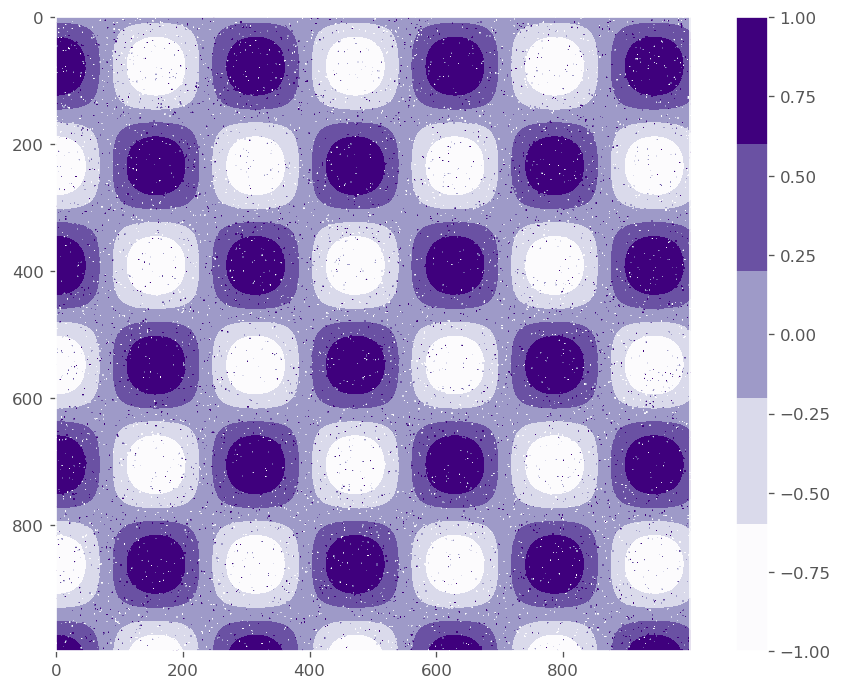

In [58]:
fig, ax = plt.subplots(figsize=(10, 7))
p = ax.imshow(y, cmap=plt.cm.get_cmap('Purples', 5), vmin=-1, vmax=1)
ax.grid(False)
cb = plt.colorbar(p);

## Paneles de gráficos.
A veces, es muy útil comparar diferentes visualizaciones de nuestra data de un lado a otro. Para este concepto, **Matplotlib** trabaja con el ideal de paneles de gráficos (o, literalmente, subgráficos o *subplots*): Grupos de gráficos más pequeños que conviven en una única figura. Estos *subplots* pueden ser incrustaciones, grillas o mallas más complejas. A continuación, exploraremos algunas rutinas sencillas para entender como crear estos objetos.

### Subplots manuales.
El método más básico para crear subplots es mediante la función `plt.axes()`. Como hemos visto previamente, por defecto, dicha función crea un objeto de tipo `Axes` que llena la figura completamente. Dicha función también puede tomar un argumento opcional que es una lista de cuatro números en el sistema coordenado que conforma tal figura. Estos números representan los valores `[izquierda, fondo, ancho, altura]` en dicho sistema coordenado, y varían de 0 en el sector inferior izquierdo de la figura, a 1 en el sector superior derecho.

Por ejemplo, podemos crear un eje incrustado en la región superior derecha de otro eje, seteando las posiciones x e y en 0.65 (esto es, partiendo en el 65% del ancho y de la altura de la figura original, respectivamente), y seteando su tamaño en 0.2 (es decir, un 20% de la figura original):

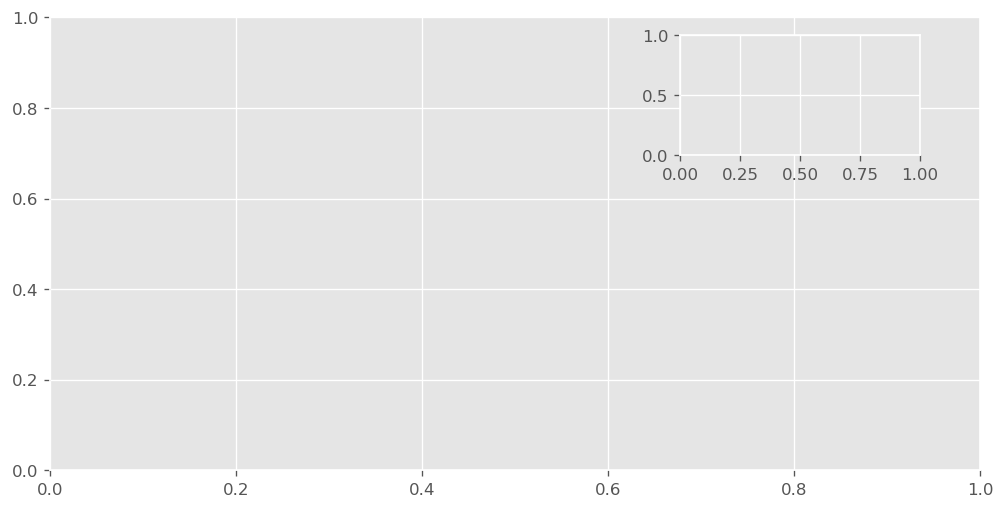

In [59]:
# Primer intento de incrustación.
fig = plt.figure(figsize=(10, 5))
ax1 = plt.axes()  # Eje estándar
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]);

El equivalente de la función `plt.axes()` en la interfaz orientada a objetos es el método `fig.add_axes()`, que como vemos se aplica directamente sobre la figura que hemos creado por medio de la figura `plt.figure()`. Usemos esto para crear dos ejes verticalmente apilados:

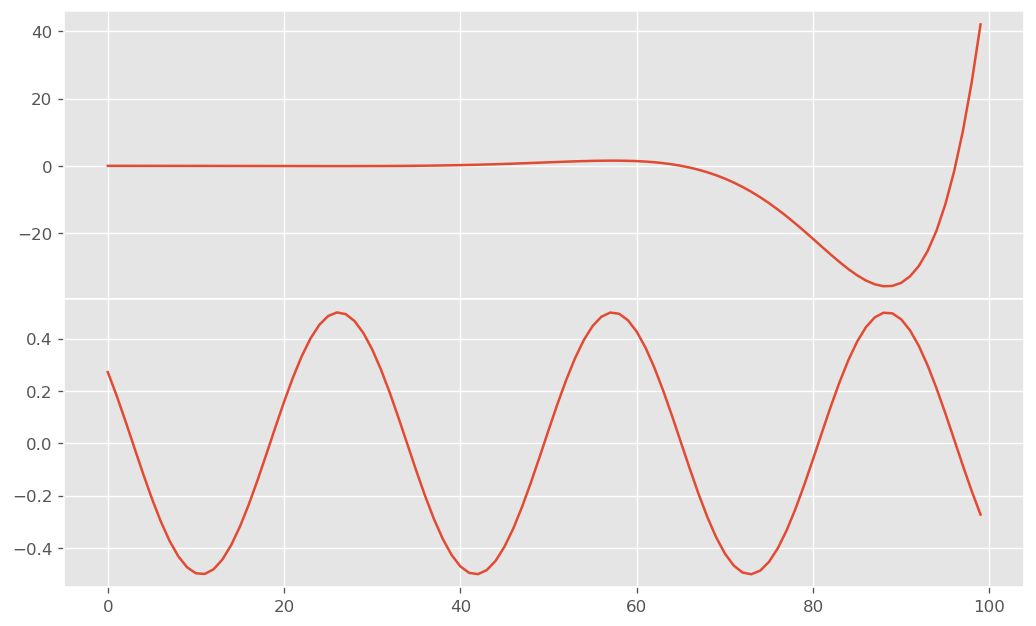

In [60]:
# Creamos los paneles del gráfico (uno superior y uno inferior).
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])

# Rellenamos cada panel con un gráfico.
x = np.linspace(start=-5, stop=5, num=100)
ax1.plot(np.exp(x)*np.cos(x))
ax2.plot(np.sin(x)*np.cos(x));

Ahora tenemos dos paneles (el superior sin marcas de graduación en su eje horizontal, lo que hemos definido mediante el uso del parámetro `xticklabels`, asignándole una lista vacía) que son tangentes los unos con los otros: El fondo del panel superior (en la posición `0.5`) coincide con el inicio del panel inferior (en la posición `0.1 + 0.4`).

### Grillas automáticas.
Un conjunto de gráficos alineados horizontal o verticalmente constituye una necesidad muy común en **Matplotlib**, por lo que existen rutinas que permiten su creación de manera muy sencilla. La más básica de estas rutinas es `plt.subplot()` (que ya la habíamos usado previamente, aunque sin entrar en mayores detalles), la que permite crear un único panel en una grilla. Como se observa en el siguiente bloque de código, esta función acepta tres argumentos enteros: El número de filas de la grilla, el número de columnas, y el índice del gráfico que se creará dentro de la grilla, cuyo orden es de izquierda a derecha, y de arriba hacia abajo:

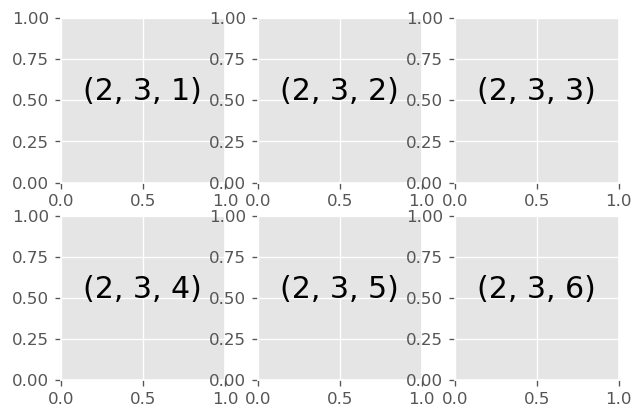

In [61]:
# Creación de una grilla completa.
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

En el loop anterior hemos usado la función `plt.text()` para generar el texto que caracteriza los valores que toman los argumentos de la función `plt.subplot()` con respecto a las posiciones de los paneles en esta grilla. Ya profundizaremos en la creación de texto y anotaciones más adelante.

Observemos que la figura anterior presenta varios problemas relativos al posicionamiento de las marcas de graduación en cada panel, ya que tienden a superponerse y *estorbarse* entre sí. La función `plt.subplots_adjust()` puede ser utilizada para ajustar el espacio entre los gráficos que constituyen una grilla y evitar inconvenientes como el anterior. Si deseamos construir una grilla como la anterior por medio del uso de la interfaz orientada a objetos de **Matplotlib**, aplicando en este caso el método `subplots_adjust()` sobre la figura propiamente tal para construir una grilla sin superposición de marcas de graduación, podemos escribir:

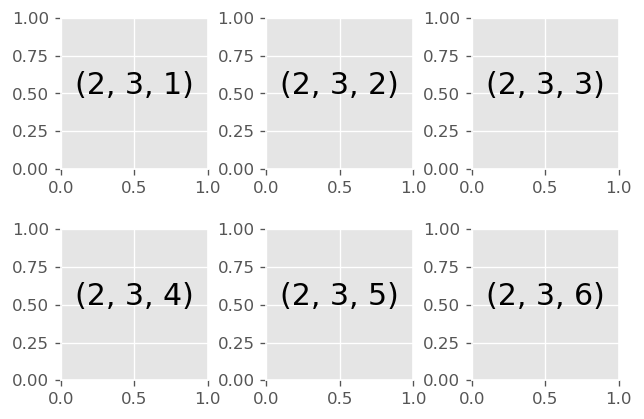

In [62]:
# Mismo caso anterior, orientado a objetos y bien ajustado.
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

Los parámetros `hspace` y `wspace` regulan el espaciamiento vertical y horizontal, respectivamente, en unidades de la correspondiente dimensión del respectivo panel (en nuestro caso, 40% en ambas dimensiones).

### Grillas instantáneas.
La técnica descrita previamente para la generación de gráficos en grillas puede llegar a ser un tanto tediosa. Especialmente si queremos ocultar los rótulos de los ejes X e Y en los sub-gráficos interiores. En este caso, la función `plt.subplots()` es la herramienta más sencilla de utilizar. En vez de crear un único sub-gráfico, esta función genera una grilla completa de ellos en una única línea, retornándolos en uà estructura construida sobre un arreglo de **Numpy**. Los argumentos de esta función corresponden al número de filas y el número de columnas de la grilla de gráficos (`nrow` y `ncol`, respectivamente), con algunos argumentos adicionales, como `sharex` y `sharey`, los cuales nos permiten especificar las relaciones que tendrán los ejes de cada gráfico (puntualmente, su compartirán los ejes X e Y entre ellos).

En el siguiente bloque de código, crearemos una grilla de 2x3 paneles, donde cada elemento en la misma fila comparte su eje Y, y cada elemento en la misma columna comparte su eje X:

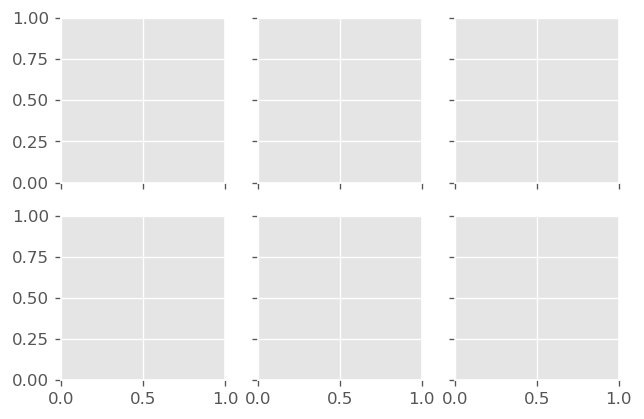

In [63]:
# Grilla instantánea.
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)

Notemos que, al especificar los parámetros `sharex` y `sharey`, hemos removido automáticamente los rótulos de eje de los gráficos interiores, logrando que la grilla se vea mucho más limpia. La grilla resultante de objetos tipo `Axes` se retorna en un arreglo de **Numpy**, lo que permite una especificación conveniente de los subgáficos mediante una notación indexada:

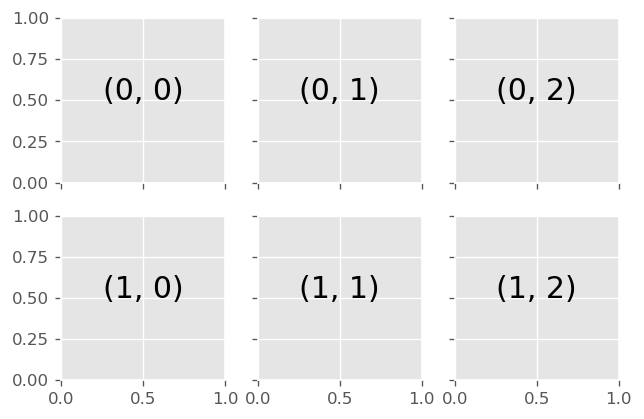

In [64]:
# Objetos tipo Axes en un arreglo bidimensional, indexados de  forma tal que la posición 
# de cada sub-gráfico es del tipo [fila, columna] en la grilla.
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

Es claro que esta forma de construir grillas de gráficos es más intuitiva y escalable que la realizada previamente con la función `plt.subplot()`.

Es posible construir grillas no regulares; es decir, cuyos paneles no sean todos del mismo tamaño. Para ello, podemos recurrir a la clase `plt.Gridspec()`. Sin embargo, profundizaremos en este tema más adelante, cuando abordemos la graficación de conjuntos de datos tridimensionales.

## Incorporación de textos y anotaciones.
La creación de una visualización de calidad involucra, en general, guiar al usuario del gráfico de manera tal que la figura cuente una especie de historia (de hecho, este *arte*, digámoslo no de forma peyorativa, es de hecho un concepto interesante en sí mismo, conocido como *storytelling*, y que tiene exponentes notables, como Steve Jobs). En algunos tipos de gráficos, dicha historia puede ser contada de manera puramente visual, sin la necesidad de añadir ningún tipo de anotación, pero otros casos, algunas pequeñas anotaciones y rótulos pueden ser necesarias. Quizás, los tipos más básicos de anotaciones que usaremos siempre serán los rótulos de ejes y títulos de un gráfico, pero, evidentemente, las opciones que nos ofrece **Matplotlib** van mucho más allá de esto. Echemos un vistazo a cómo podemos añadir anotaciones a nuestros gráficos a partir de algo de data, a fin de darnos cuenta cómo aquello puede ayudarnos a transmitir un nivel más enriquecido de información.

Partamos creando un gráfico muy sencillo:

In [65]:
# Creamos algo de data.
x = np.linspace(start=-3, stop=3, num=100)
y = x**3

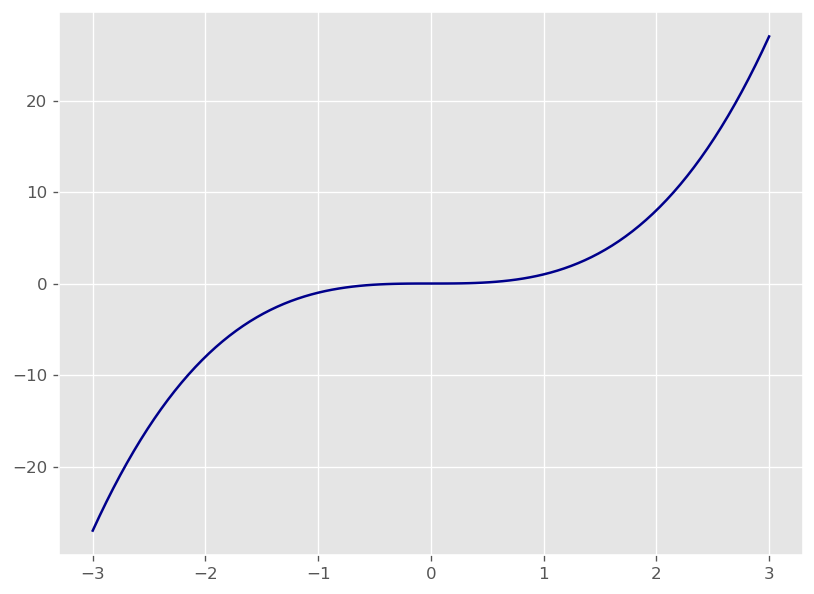

In [66]:
# Construimos el gráfico.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, color="darkblue");

Partiremos generando algunas anotaciones mediante el uso de la función `plt.text()` (o el método `ax.text()`, en caso de trabajar con la interfaz orientada a objetos de **Matplotlib**). Escribiremos el nombre y la ecuación asociada a la función anterior. Para ello, haremos uso de los siguientes argumentos: `x` e `y` para especificar las coordenadas asociadas al texto que queremos escribir (por supuesto, referidas al gráfico en cuestión); `s` para especificar el texto en cuestión; `fontsize` para determinar el tamaño del texto; `color` para determinar el color asociado al texto; y `ha` para especificar el alineamiento del texto en relación a las coordenadas que establecimos como ubicación del mismo (`center` para centrar el texto con respecto a tales coordenadas):

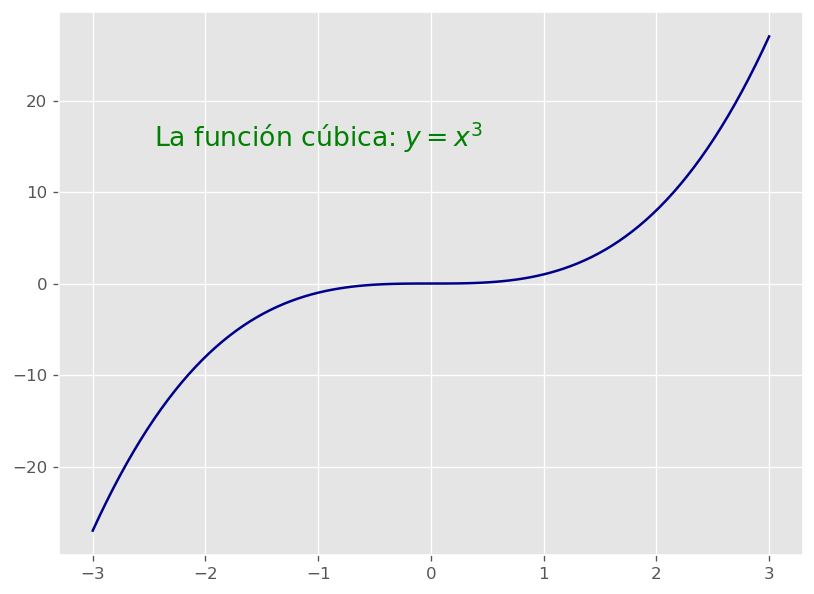

In [67]:
# Una anotación sencilla.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, color="darkblue")
ax.text(x=-1, y=15, s=r"La función cúbica: $y=x^{3}$", color="green", fontsize=16, ha="center");